In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
city_data = []

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | monte patria
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | urbano santos
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | nelson bay
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | inhambane
Processing Record 15 of Set 1 | zanatepec
City not found. Skipping...
Processing Record 16 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 17 of Set 1 | sahaswan
Processing Record 18 of Set 1 | angoram
Processing Record 19 of Set 1 | baykit
Processing Record 20 of Set 1 | albany
Processing

Processing Record 38 of Set 4 | balakhta
Processing Record 39 of Set 4 | tanjong sepat
City not found. Skipping...
Processing Record 40 of Set 4 | mende
Processing Record 41 of Set 4 | haibowan
City not found. Skipping...
Processing Record 42 of Set 4 | san vicente
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | kedrovyy
Processing Record 45 of Set 4 | jumla
Processing Record 46 of Set 4 | dunedin
Processing Record 47 of Set 4 | mount isa
Processing Record 48 of Set 4 | sistranda
Processing Record 49 of Set 4 | paulo afonso
Processing Record 50 of Set 4 | saint-joseph
Processing Record 1 of Set 5 | cap malheureux
Processing Record 2 of Set 5 | carballo
Processing Record 3 of Set 5 | labytnangi
Processing Record 4 of Set 5 | castro
Processing Record 5 of Set 5 | itarema
Processing Record 6 of Set 5 | realeza
Processing Record 7 of Set 5 | leh
Processing Record 8 of Set 5 | cayenne
Processing Record 9 of Set 5 | hilo
Processing Record 10 of Set 5 | grand forks


Processing Record 25 of Set 8 | mnogovershinnyy
Processing Record 26 of Set 8 | mecca
Processing Record 27 of Set 8 | samusu
City not found. Skipping...
Processing Record 28 of Set 8 | zhigansk
Processing Record 29 of Set 8 | shenzhen
Processing Record 30 of Set 8 | mahebourg
Processing Record 31 of Set 8 | tamandare
Processing Record 32 of Set 8 | tongren
Processing Record 33 of Set 8 | la ligua
Processing Record 34 of Set 8 | bondoukou
Processing Record 35 of Set 8 | libertador general san martin
Processing Record 36 of Set 8 | alice springs
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | sur
Processing Record 39 of Set 8 | rungata
City not found. Skipping...
Processing Record 40 of Set 8 | tekeli
Processing Record 41 of Set 8 | belmonte
Processing Record 42 of Set 8 | santa maria
Processing Record 43 of Set 8 | merke
Processing Record 44 of Set 8 | tingi
Processing Record 45 of Set 8 | nazas
Processing Record 46 of Set 8 | buala
Processing Record 47 of Set 8

Processing Record 12 of Set 12 | kondapalle
Processing Record 13 of Set 12 | panjab
Processing Record 14 of Set 12 | champerico
Processing Record 15 of Set 12 | mercedes
Processing Record 16 of Set 12 | mega
Processing Record 17 of Set 12 | akureyri
Processing Record 18 of Set 12 | itaituba
Processing Record 19 of Set 12 | baie-comeau
Processing Record 20 of Set 12 | kunnamangalam
Processing Record 21 of Set 12 | aripuana
Processing Record 22 of Set 12 | matata
Processing Record 23 of Set 12 | pimentel
Processing Record 24 of Set 12 | tizimin
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | juegang
Processing Record 27 of Set 12 | degtyarsk
Processing Record 28 of Set 12 | westport
Processing Record 29 of Set 12 | pilar
Processing Record 30 of Set 12 | inta
Processing Record 31 of Set 12 | bargal
City not found. Skipping...
Processing Record 32 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 33 of Set 12 | pacific grove
Processing Record

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,29.86,100,75,13.80,AR,2021-06-01 16:32:19
1,Monte Patria,-30.6919,-70.9467,82.80,13,25,4.18,CL,2021-06-01 16:32:19
2,Bluff,-46.6000,168.3333,49.80,83,99,19.10,NZ,2021-06-01 16:32:20
3,Georgetown,5.4112,100.3354,83.89,82,20,1.01,MY,2021-06-01 16:27:39
4,Urbano Santos,-3.2078,-43.4036,85.41,63,34,1.72,BR,2021-06-01 16:32:21
5,Ponta Do Sol,32.6667,-17.1000,72.23,74,64,3.87,PT,2021-06-01 16:32:21
6,Barrow,71.2906,-156.7887,30.22,80,90,18.41,US,2021-06-01 16:32:22
7,Mar Del Plata,-38.0023,-57.5575,65.08,51,0,1.99,AR,2021-06-01 16:32:22
8,Nelson Bay,-32.7167,152.1500,56.68,96,93,6.04,AU,2021-06-01 16:32:22
9,Jamestown,42.0970,-79.2353,69.30,45,1,8.05,US,2021-06-01 16:32:23


In [10]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-06-01 16:32:19,-54.8000,-68.3000,29.86,100,75,13.80
1,Monte Patria,CL,2021-06-01 16:32:19,-30.6919,-70.9467,82.80,13,25,4.18
2,Bluff,NZ,2021-06-01 16:32:20,-46.6000,168.3333,49.80,83,99,19.10
3,Georgetown,MY,2021-06-01 16:27:39,5.4112,100.3354,83.89,82,20,1.01
4,Urbano Santos,BR,2021-06-01 16:32:21,-3.2078,-43.4036,85.41,63,34,1.72
...,...,...,...,...,...,...,...,...,...
568,Hervey Bay,AU,2021-06-01 16:36:21,-25.2986,152.8535,63.03,86,60,4.00
569,Dergachi,RU,2021-06-01 16:36:22,51.2328,48.7659,65.80,77,92,14.25
570,Mehamn,NO,2021-06-01 16:36:22,71.0357,27.8492,46.58,93,75,17.27
571,Maceio,BR,2021-06-01 16:36:23,-9.6658,-35.7353,85.44,61,40,8.75


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

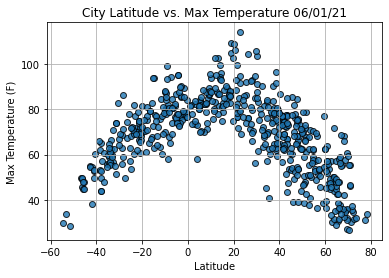

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

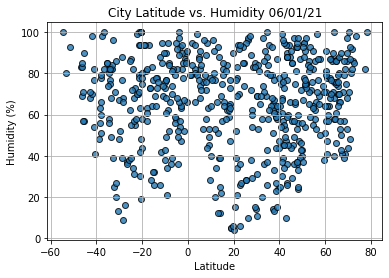

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

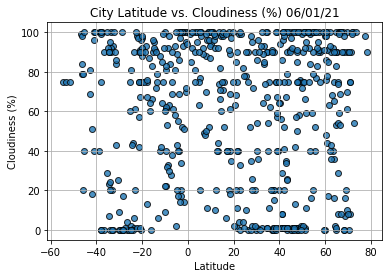

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

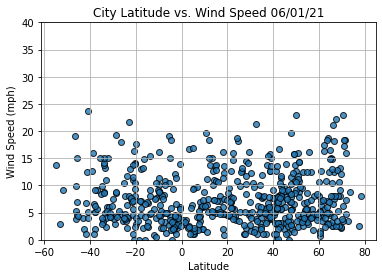

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Georgetown,MY,2021-06-01 16:27:39,5.4112,100.3354,83.89,82,20,1.01
5,Ponta Do Sol,PT,2021-06-01 16:32:21,32.6667,-17.1000,72.23,74,64,3.87
6,Barrow,US,2021-06-01 16:32:22,71.2906,-156.7887,30.22,80,90,18.41
9,Jamestown,US,2021-06-01 16:32:23,42.0970,-79.2353,69.30,45,1,8.05
11,Kodiak,US,2021-06-01 16:32:24,57.7900,-152.4072,45.91,87,90,8.05


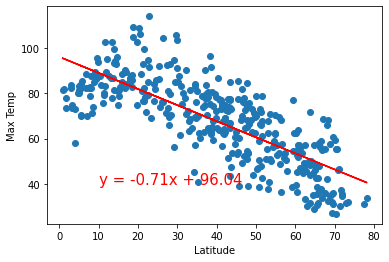

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


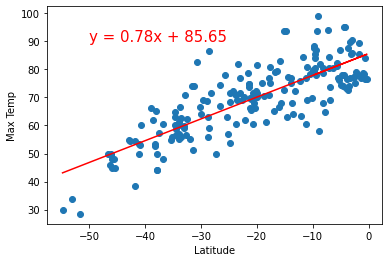

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

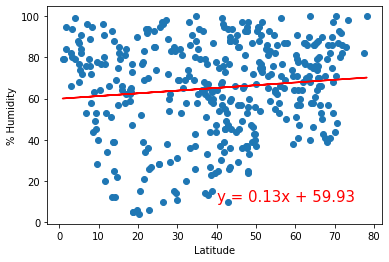

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

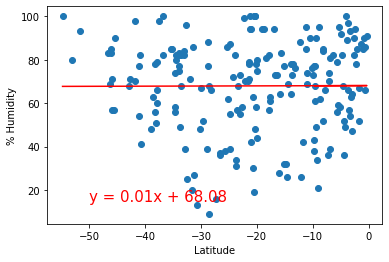

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

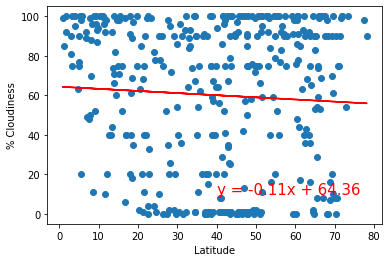

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

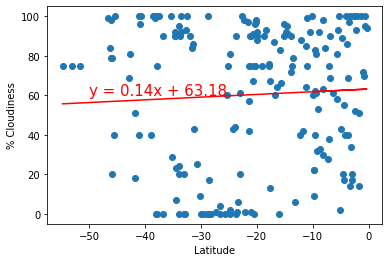

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

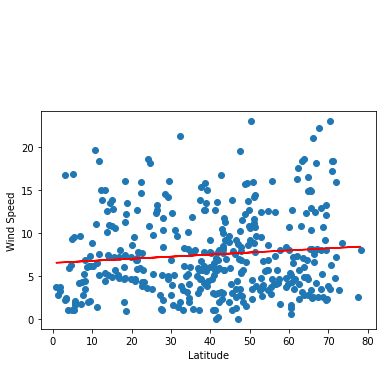

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

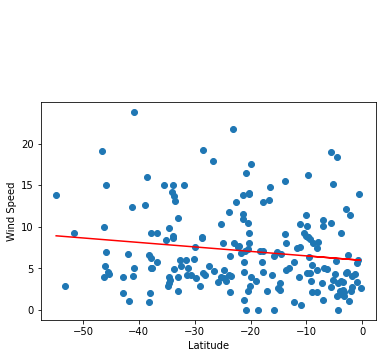

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))